In [271]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import warnings
warnings.simplefilter('ignore')

In [245]:
purchase = pd.read_csv('purchase_history.csv')
purchase

,user_id,id
0,222087,"27,26"
1,1343649,"6,47,17"
2,404134,"18,12,23,22,27,43,38,20,35,1"
3,1110200,"9,23,2,20,26,47,37"
4,224107,"31,18,5,13,1,21,48,16,26,2,44,32,20,37,42,35,4..."
...,...,...
39469,704794,"48,42,44,10,2"
39470,31237,"23,21,26,27,41,9,47,43,20,40,16,24,46"
39471,724925,"3,39,28,4,1,43,47,27,18,25,44,10,30,2"
39472,651509,"13,39,20,32,37,1,3,18,34"


In [246]:
item_id = pd.read_csv('item_to_id.csv')
item_id.head()

,Item_name,Item_id
0,coffee,43
1,tea,23
2,juice,38
3,soda,9
4,sandwich loaves,39


In [247]:
item_id = item_id.sort_values(by = 'Item_id')
item_id = item_id.set_index('Item_id')
item_id.head()

,Item_name
Item_id,
1,sugar
2,lettuce
3,pet items
4,baby items
5,waffles


# Q1 Cusomter who bought the most items overall in her lifetime

In [248]:
#ref: https://github.com/JifuZhao/DS-Take-Home
def id_to_item(df):
    # Sum here concatnate two lists together!
    ids = df['id'].str.split(',').sum()
    id_list = [0 for i in range(1, 49)]
    for i in ids:
        id_list[int(i) - 1] += 1
        
    return pd.Series(id_list, index=list(range(1, 49)))

In [249]:
customer = purchase.groupby('user_id').apply(id_to_item)

In [250]:
customer

,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
user_id,,,,,,,,,,,,,,,,,,,,,
47,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,0,0
68,0,0,0,0,0,1,0,0,0,1,...,1,0,0,1,0,0,0,0,0,0
113,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
123,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
223,1,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1499730,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1499778,0,1,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1499797,0,0,1,0,0,1,0,0,0,0,...,1,0,0,0,0,1,1,0,0,1


In [251]:
customer.sum(axis = 1).reset_index().rename(columns={0: 'num_items'}).sort_values('num_items', ascending = False)[:1]

,user_id,num_items
4445,269335,72


# Q2 for each item, the customer who bought that product the most

In [252]:
item = customer.T
item.head()

user_id,47,68,113,123,223,281,323,394,420,453,...,1499502,1499523,1499563,1499702,1499727,1499730,1499778,1499797,1499817,1499974
1,0,0,0,0,1,0,1,1,0,1,...,0,0,1,0,0,0,0,0,1,0
2,1,0,0,0,1,0,0,1,1,1,...,1,0,1,0,0,0,1,0,2,0
3,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [253]:
item_per_user = item.idxmax(axis = 'columns').reset_index().set_index('index')
item_per_user['item_name'] = item_id['Item_name']
item_per_user
item_per_user.rename(columns={'index': 'Item_id', 0: 'User_id'})

,User_id,item_name
index,,
1,31625,sugar
2,31625,lettuce
3,154960,pet items
4,5289,baby items
5,217277,waffles
6,334664,poultry
7,175865,sandwich bags
8,151926,butter
9,269335,soda


# Q3
Cluster items based on user co-purchase history. That is, create clusters of products that
have the highest probability of being bought together. The goal of this is to replace the
old/manually created categories with these new ones. Each item can belong to just one
cluster.

Reference: https://medium.com/@masarudheena/4-best-ways-to-find-optimal-number-of-clusters-for-clustering-with-python-code-706199fa957c


Where 1 means that points are very close to their own cluster and far from other clusters, whereas -1 indicates that points are close to the neighboring clusters.

In [274]:
clusters = range(2, 20)
inertias = []
silhouettes = []

for n_clusters in clusters:
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_jobs=-1)
    kmeans = kmeans.fit(item)
    label = kmeans.predict(item)
    
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(item, label))

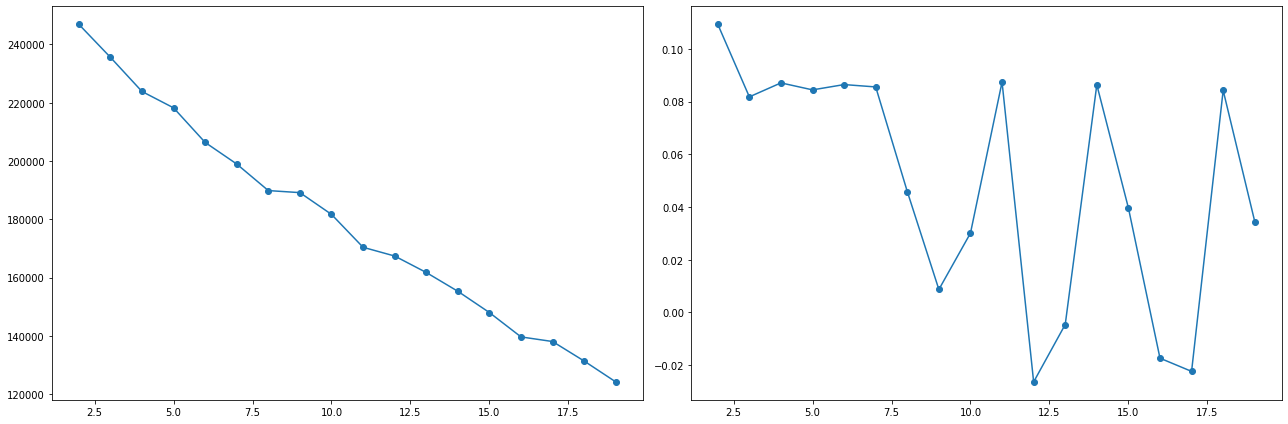

In [275]:
# visualization
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
ax[0].plot(clusters, inertias, 'o-', label='Sum of Squared Distances')
ax[1].plot(clusters, silhouettes, 'o-', label='Silhouette Score')
plt.tight_layout()
plt.show()

In [276]:
# 12 categories is the best since it has the highest Silhouette score and loca opitma by the inertia

In [288]:
kmeans = KMeans(n_clusters=12, init='k-means++', random_state=42, n_jobs=-1)
kmeans = kmeans.fit(item)
label = kmeans.predict(item)

In [289]:
pca = PCA(n_components=2, random_state=42)
pca = pca.fit(item)
pca_feature = pca.transform(item)

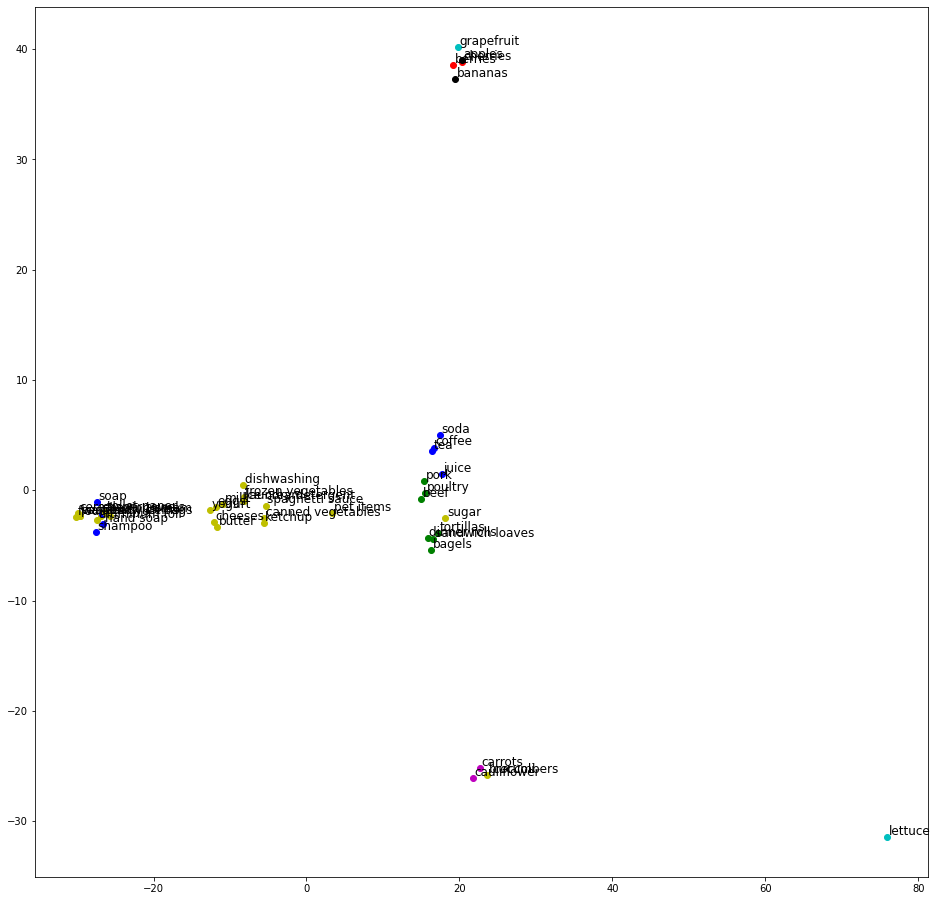

In [290]:
item_id = pd.read_csv('item_to_id.csv')
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

fig, ax = plt.subplots(figsize=(16, 16))
for j in range(len(pca_feature)):
    x = pca_feature[j][0]
    y = pca_feature[j][1]
    ax.plot(x, y, 'o', color=colors[label[j] % 8])
    name = item_id[item_id['Item_id'] == j + 1]['Item_name']
    ax.annotate(xy=(x+0.2, y+0.2), s=name.values[0], fontsize=12)

plt.show()